In [1]:
from bs4 import BeautifulSoup
import requests as re
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

soup = BeautifulSoup(re.get("http://obamaspeeches.com/").content)

link = soup.findAll('td')

a = link[1].findAll('a')

all_link = []

for i in range(len(a)):
    all_link.append("http://obamaspeeches.com/"+a[i]["href"])
    

In [2]:
df = pd.DataFrame(columns = ["speech", "link"])


for j in range(len(all_link)):
    new_soup = BeautifulSoup(re.get(all_link[j]).content)
    p = new_soup.findAll('font', {"size":"3"})
    speech = []

    for i in range(len(p)):
        speech.append(p[i].text)

    speech = "".join(speech)
    transcript = " ".join(speech.split())
    df = df.append({'speech': transcript, 'link':all_link[j]}, ignore_index=True)
    

In [3]:
#checking all the speech row have some words
for i in range(112):
    print(len(df["speech"][i]))

13435
10587
10587
9801
26010
26010
13872
12904
11033
12527
27998
9874
10081
9206
7197
9206
9206
14612
14579
9637
15516
19224
19224
25188
4464
7910
13078
10339
18721
14747
11453
7884
8900
7707
9608
26589
6618
16925
5080
17126
3393
3951
17142
5091
4666
4147
11294
7865
16657
6078
8147
6828
8386
9106
20215
9106
5274
18274
3718
11406
17268
4341
6360
2888
4886
3149
3606
13636
4509
6142
6768
12644
4927
25055
9881
13759
12349
11753
4287
4988
21413
5538
8506
15912
5637
13290
6272
8830
15578
14303
13872
17205
17205
7492
10421
5847
13962
13619
9656
4199
4806
4370
13872
4339
4339
6766
9264
8238
9069
10193
12037
4815


In [4]:
#saving dataframe as csv, we also can do things directly
#but making sure we have a local copy of data
df.to_csv("obama.csv")

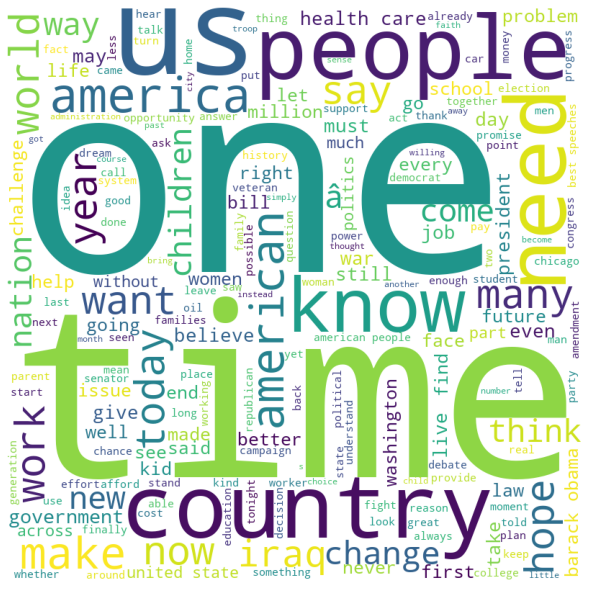

In [5]:

df = pd.read_csv(r"obama.csv", encoding ="latin-1") 
  
comment_words = '' 

stopwords = set(STOPWORDS) 
stopwords.add("will")
stopwords.add("u")


  
# iterate through the csv file 
for val in df.speech: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 